In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/train.csv', encoding='cp949')
df = df.dropna()

In [71]:
len(df)

51047

In [100]:
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [104]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.711815
Yes    0.288185
Name: proportion, dtype: float64

In [68]:
df['Churn'].value_counts()

Churn
No     11830
Yes     4050
Name: count, dtype: int64

In [33]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.711815
Yes    0.288185
Name: proportion, dtype: float64

In [238]:
df.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [6]:
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [3]:
df = df.dropna()

In [ ]:
df = df.dropna()
display(len(df))
display(df.columns.unique())
display(df.Churn.value_counts())
display(df.isnull().sum())
display(df.duplicated().sum())
display(df.describe())
display(df.info())

In [224]:
51047 - 49752

1295

In [4]:
df.info()
# 전체 행수 51047
# 컬럼 수 58
# 행 수 49752  
# 결측치 1295

<class 'pandas.core.frame.DataFrame'>
Index: 49752 entries, 0 to 51043
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 49752 non-null  int64  
 1   Churn                      49752 non-null  object 
 2   MonthlyRevenue             49752 non-null  float64
 3   MonthlyMinutes             49752 non-null  float64
 4   TotalRecurringCharge       49752 non-null  float64
 5   DirectorAssistedCalls      49752 non-null  float64
 6   OverageMinutes             49752 non-null  float64
 7   RoamingCalls               49752 non-null  float64
 8   PercChangeMinutes          49752 non-null  float64
 9   PercChangeRevenues         49752 non-null  float64
 10  DroppedCalls               49752 non-null  float64
 11  BlockedCalls               49752 non-null  float64
 12  UnansweredCalls            49752 non-null  float64
 13  CustomerCareCalls          49752 non-null  float64


#### 결측치

In [70]:
# 51047
temp = df.isna().sum()[df.isna().sum() > 0]
temp

MonthlyRevenue           156
MonthlyMinutes           156
TotalRecurringCharge     156
DirectorAssistedCalls    156
OverageMinutes           156
RoamingCalls             156
PercChangeMinutes        367
PercChangeRevenues       367
ServiceArea               24
Handsets                   1
HandsetModels              1
CurrentEquipmentDays       1
AgeHH1                   909
AgeHH2                   909
grade                    156
dtype: int64

In [81]:
# Churn 비율 확인
rate = df['Churn'].value_counts(normalize=True)
rate

Churn
No     0.71368
Yes    0.28632
Name: proportion, dtype: float64

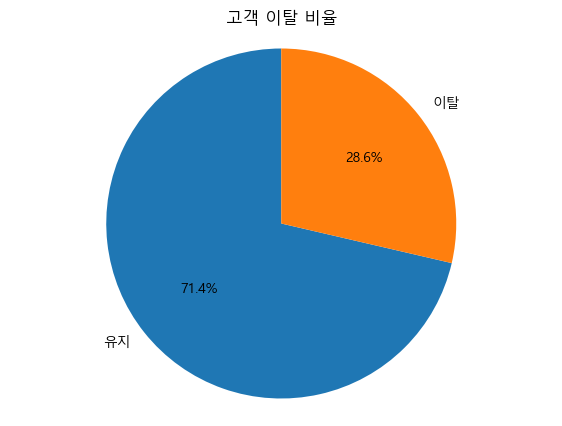

In [16]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

rate = df['Churn'].value_counts(normalize=True)

plt.figure(figsize=(7, 5))
wedges, texts, autotexts = plt.pie(rate.values, labels=rate.index, autopct='%1.1f%%', startangle=90)
plt.title("고객 이탈 비율")
plt.axis('equal')

new_labels = ['유지', '이탈']  # 새로운 레이블 리스트
for i, text in enumerate(texts):
    text.set_text(new_labels[i])

plt.show()


#### 이탈 고객과 유지 고객 비교

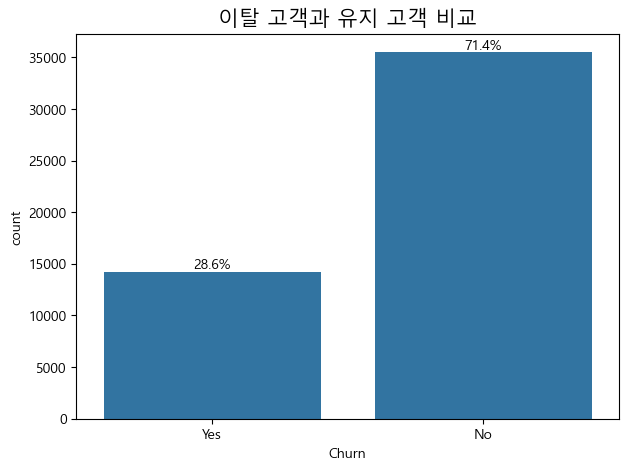

In [232]:

plt.figure(figsize=(7, 5))
ax = sns.countplot(x='Churn', data=df)
plt.title('이탈 고객과 유지 고객 비교', size=15)

total = len(df)

for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total * 100):.1f}%'
    ax.annotate(f'{percentage}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.show()


#### 상관 관계 Heapmap

In [16]:
corr.ms

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,Churn_group
MonthlyRevenue,1.000000,0.712734,0.629391,0.407523,0.787317,0.304086,-0.027052,-0.014223,0.429374,0.232651,...,0.236179,-0.216644,-0.108608,-0.105829,0.012019,0.014795,0.017879,-0.079309,0.035417,-0.012065
MonthlyMinutes,0.712734,1.000000,0.585375,0.392950,0.569083,0.112028,-0.044257,-0.038438,0.593149,0.318114,...,0.293145,-0.311033,-0.163928,-0.143321,0.011856,0.014966,0.064916,-0.145964,0.045723,-0.050165
TotalRecurringCharge,0.629391,0.585375,1.000000,0.311440,0.201011,0.073855,-0.016284,-0.024126,0.354148,0.178584,...,0.226597,-0.247592,-0.106111,-0.101134,-0.017562,-0.002218,0.036912,-0.075415,0.044019,-0.058945
DirectorAssistedCalls,0.407523,0.392950,0.311440,1.000000,0.287109,0.070134,-0.025542,-0.014696,0.262960,0.140135,...,0.170469,-0.120887,-0.058874,-0.057644,0.010556,0.013857,-0.005592,-0.014985,0.022616,-0.019714
OverageMinutes,0.787317,0.569083,0.201011,0.287109,1.000000,0.062955,-0.026377,-0.014570,0.329464,0.190967,...,0.143102,-0.124190,-0.065212,-0.062350,0.014741,0.008474,0.008452,-0.048051,0.021671,0.015301
RoamingCalls,0.304086,0.112028,0.073855,0.070134,0.062955,1.000000,-0.055106,-0.093108,0.066135,0.029070,...,0.022641,-0.027969,-0.010467,-0.012171,-0.002423,-0.000440,-0.007440,-0.014034,0.004952,0.010955
PercChangeMinutes,-0.027052,-0.044257,-0.016284,-0.025542,-0.026377,-0.055106,1.000000,0.607504,-0.082284,-0.054548,...,-0.010669,-0.005830,0.014243,0.003986,-0.021400,-0.008232,0.003520,0.012162,-0.004715,-0.033194
PercChangeRevenues,-0.014223,-0.038438,-0.024126,-0.014696,-0.014570,-0.093108,0.607504,1.000000,-0.036180,-0.031916,...,-0.015881,0.006046,0.006914,0.001920,-0.018961,-0.012295,0.001244,0.005066,-0.005234,0.013015
DroppedCalls,0.429374,0.593149,0.354148,0.262960,0.329464,0.066135,-0.082284,-0.036180,1.000000,0.184385,...,0.217574,-0.216252,-0.119905,-0.108245,0.020417,0.014650,0.024921,-0.097358,0.031109,-0.015062
BlockedCalls,0.232651,0.318114,0.178584,0.140135,0.190967,0.029070,-0.054548,-0.031916,0.184385,1.000000,...,0.087303,-0.124425,-0.048380,-0.032918,0.013012,0.008429,0.026000,-0.065170,0.004748,-0.004474


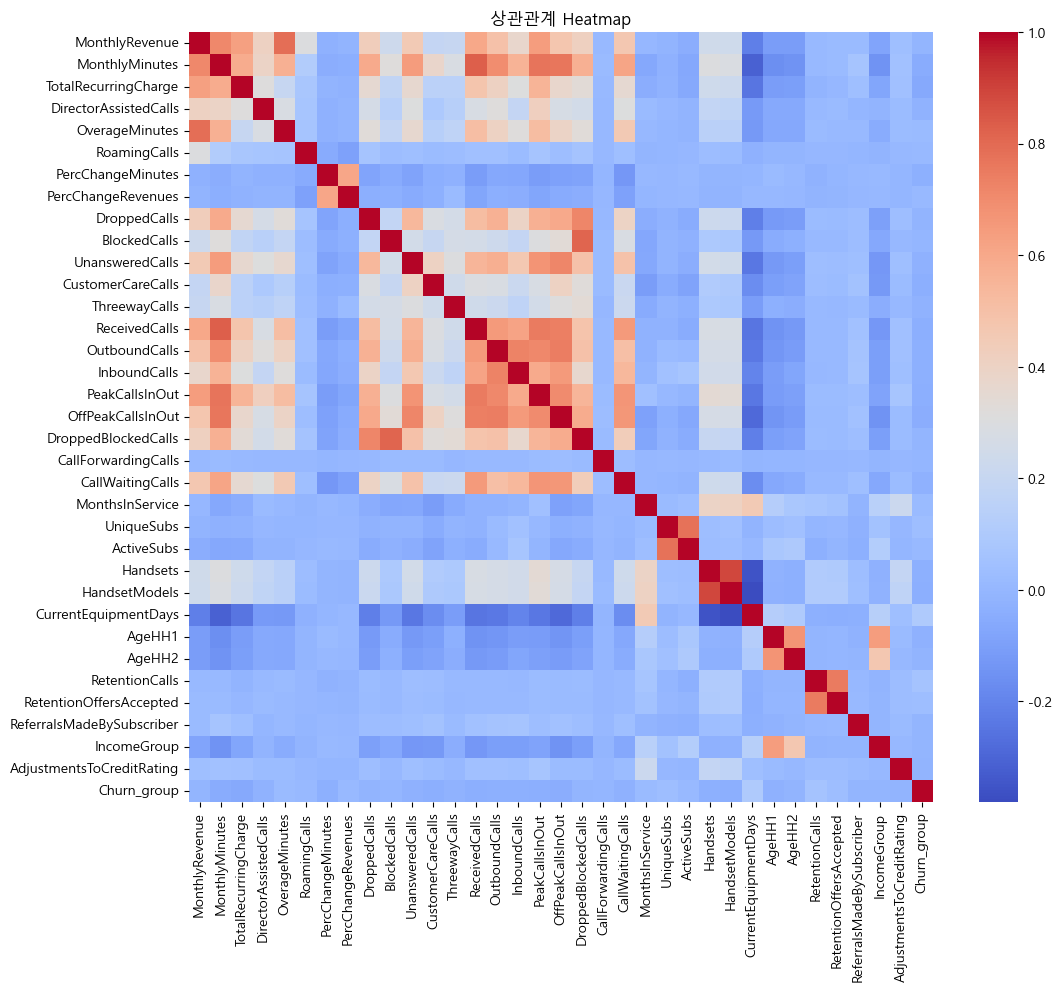

In [15]:
plt.rcParams['axes.unicode_minus'] = False

num_data = df.loc[:, ~df.columns.isin(['CustomerID'])].select_dtypes(include=['float64', 'int64', 'int32']).columns
corr = df[num_data].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('상관관계 Heatmap')
plt.show()

In [30]:
import pandas as pd
import numpy as np

df['Churn_group'] = df['Churn'].map({'Yes': 1, 'No': 0})

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

corr = df[numeric_columns].corr()['Churn_group'].abs().sort_values(ascending=False)

top_10_corr = corr[1:11]
print("Churn과 상관관계가 높은 상위 10개 변수:")
print(corr)

Churn과 상관관계가 높은 상위 10개 변수:
Churn_group                  1.000000
CurrentEquipmentDays         0.102513
TotalRecurringCharge         0.058945
RetentionCalls               0.058422
MonthlyMinutes               0.050165
OffPeakCallsInOut            0.040955
HandsetModels                0.040470
CustomerID                   0.040186
PeakCallsInOut               0.039527
ReceivedCalls                0.037097
CustomerCareCalls            0.035331
RetentionOffersAccepted      0.034511
InboundCalls                 0.033855
Handsets                     0.033730
PercChangeMinutes            0.033194
UniqueSubs                   0.032839
OutboundCalls                0.032489
AgeHH1                       0.028761
UnansweredCalls              0.028192
CallWaitingCalls             0.025509
ThreewayCalls                0.023716
DirectorAssistedCalls        0.019714
AgeHH2                       0.017577
MonthsInService              0.017544
AdjustmentsToCreditRating    0.016123
OverageMinutes         

#### 고객이탈 중요 자료 상관관계분석

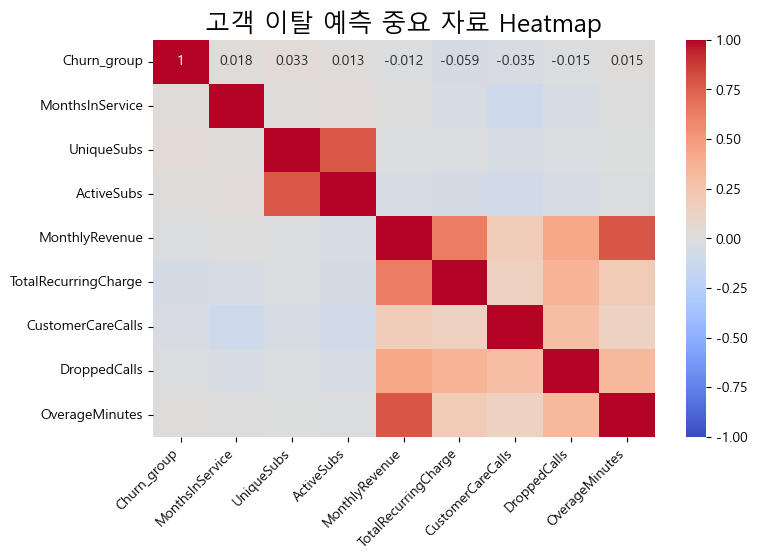

In [33]:
df['Churn_group'] = np.where(df['Churn'] == 'Yes', 2, 1)

columns = ['Churn_group', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'MonthlyRevenue', 'TotalRecurringCharge', 'CustomerCareCalls', 'DroppedCalls', 'OverageMinutes']

corr = df[columns].corr()

# 히트맵 생성
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('고객 이탈 예측 중요 자료 Heatmap', size=18)

plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

df['Churn_group'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
# df
df[['MonthsInService', 'Churn_group']].corr()

,MonthsInService,Churn_group
MonthsInService,1.000000,0.017544
Churn_group,0.017544,1.000000


#### 월간 수익 구간별 이탈률

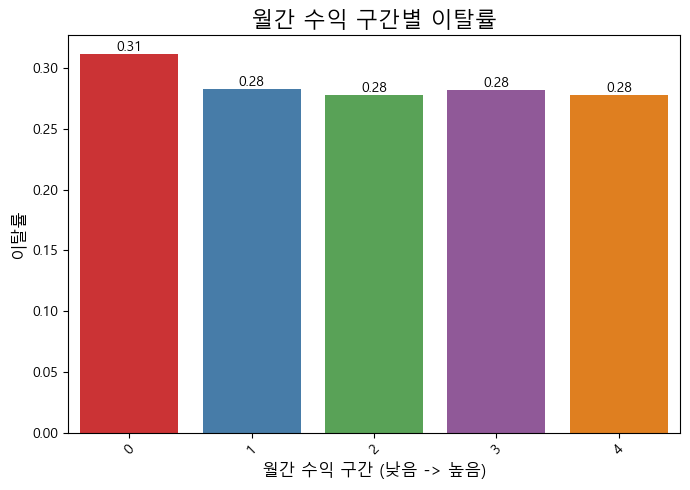

In [19]:

df['grade'] = pd.qcut(df['MonthlyRevenue'], q=5, labels=False)
df['Churn_group'] = np.where(df['Churn'] == 'Yes', 1, 0)

rate = df.groupby('grade')['Churn_group'].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(x='grade', y='Churn_group', data=rate, hue='grade', palette='Set1', legend=False)

plt.title('월간 수익 구간별 이탈률', fontsize=16)
plt.xlabel('월간 수익 구간 (낮음 -> 높음)', fontsize=12)
plt.ylabel('이탈률', fontsize=12)
plt.xticks(rotation=45)

for i, v in enumerate(rate['Churn_group']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### 가입 기간별 고객이탈 상관 분석

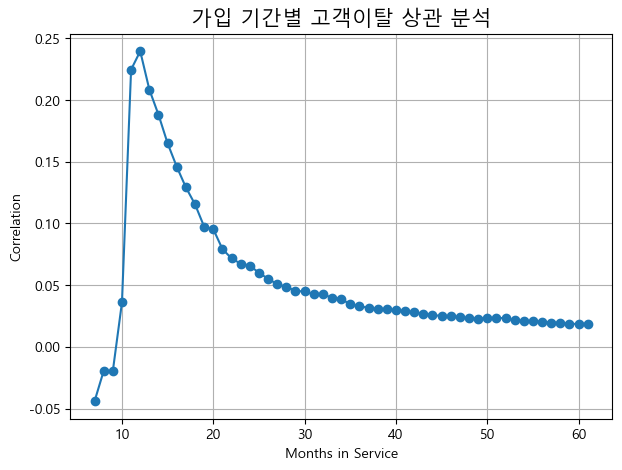

In [39]:
import matplotlib.font_manager as fm

font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('../data/train.csv', encoding='cp949')

df['Churn_group'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

months = sorted(df['MonthsInService'].unique())
correlations = []

for month in months:
    subset = df[df['MonthsInService'] <= month]
    corr = subset[['MonthsInService', 'Churn_group']].corr().iloc[0, 1]
    correlations.append(corr)

plt.figure(figsize=(7, 5))
plt.plot(months, correlations, marker='o')
plt.title('가입 기간별 고객이탈 상관 분석', size=15)
plt.xlabel('Months in Service')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

#### 고객 서비스 통화 횟수별 고객 수와 이탈률

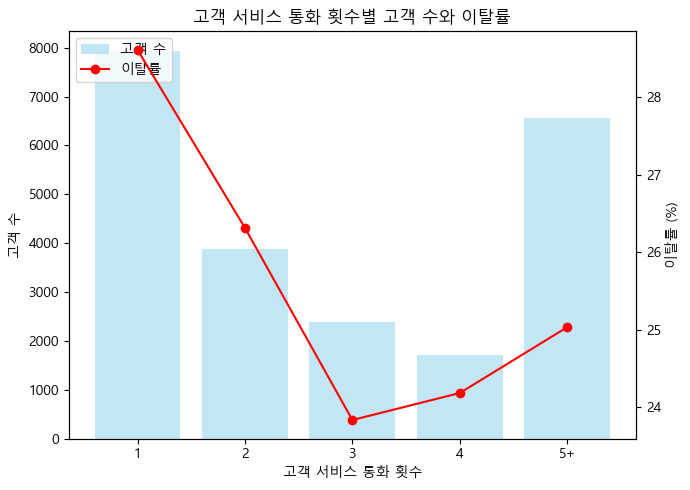

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

df['CallGroup'] = pd.cut(df['CustomerCareCalls'], bins=[0, 1, 2, 3, 4, float('inf')], 
                         labels=['1', '2', '3', '4', '5+'])

churn_rate = df.groupby('CallGroup', observed=True)['Churn_group'].mean() * 100

customer_count = df['CallGroup'].value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(7, 5))

ax1.bar(customer_count.index, customer_count.values, alpha=0.5, color='skyblue', label='고객 수')
ax1.set_xlabel('고객 서비스 통화 횟수')
ax1.set_ylabel('고객 수')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(churn_rate.index, churn_rate.values, color='red', marker='o', label='이탈률')
ax2.set_ylabel('이탈률 (%)')
ax2.tick_params(axis='y')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('고객 서비스 통화 횟수별 고객 수와 이탈률')
plt.tight_layout()
plt.show()

#### Drop Call 횟 수 별 고객 이탈률

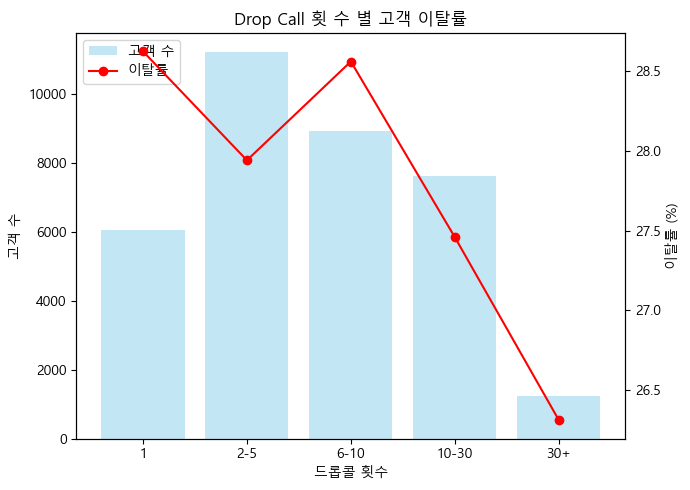

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

df['Churn_group'] = df['Churn'].map({'Yes': 1, 'No': 0})

df['DroppedCallGroup'] = pd.cut(df['DroppedCalls'], bins=[ 1, 2, 5, 10, 30, float('inf')], 
                                labels=[ '1', '2-5', '6-10', '10-30', '30+'])

churn_rate = df.groupby('DroppedCallGroup', observed=True)['Churn_group'].mean() * 100

customer_count = df['DroppedCallGroup'].value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(7, 5))

ax1.bar(customer_count.index, customer_count.values, alpha=0.5, color='skyblue', label='고객 수')
ax1.set_xlabel('드롭콜 횟수')
ax1.set_ylabel('고객 수')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(churn_rate.index, churn_rate.values, color='red', marker='o', label='이탈률')
ax2.set_ylabel('이탈률 (%)')
ax2.tick_params(axis='y')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Drop Call 횟 수 별 고객 이탈률')
plt.tight_layout()
plt.show()


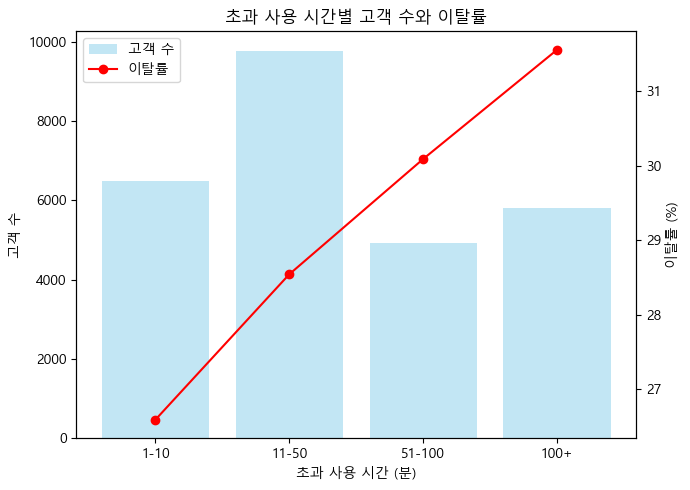

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Churn_group'] = df['Churn'].map({'Yes': 1, 'No': 0})

df['OverageGroup'] = pd.cut(df['OverageMinutes'], 
                            bins=[ 0, 10, 50, 100, float('inf')], 
                            labels=['1-10', '11-50', '51-100', '100+'])

churn_rate = df.groupby('OverageGroup', observed=True)['Churn_group'].mean() * 100

customer_count = df['OverageGroup'].value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(7, 5))

ax1.bar(customer_count.index, customer_count.values, alpha=0.5, color='skyblue', label='고객 수')
ax1.set_xlabel('초과 사용 시간 (분)')
ax1.set_ylabel('고객 수')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(churn_rate.index, churn_rate.values, color='red', marker='o', label='이탈률')
ax2.set_ylabel('이탈률 (%)')
ax2.tick_params(axis='y')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('초과 사용 시간별 고객 수와 이탈률')
plt.tight_layout()
plt.show()


#### 월 수입대별 이탈률 비교

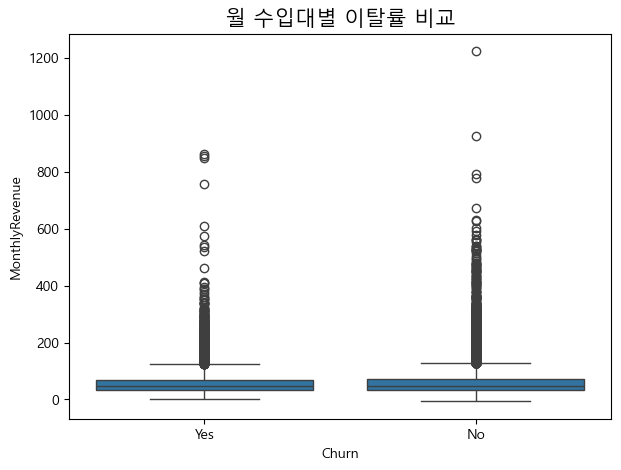

In [194]:
plt.figure(figsize = (7, 5))
sns.boxplot(x='Churn', y='MonthlyRevenue', data=df)
plt.title('월 수입대별 이탈률 비교', size=15)
plt.show()

#### 사용시간별 고객 이탈율 비교

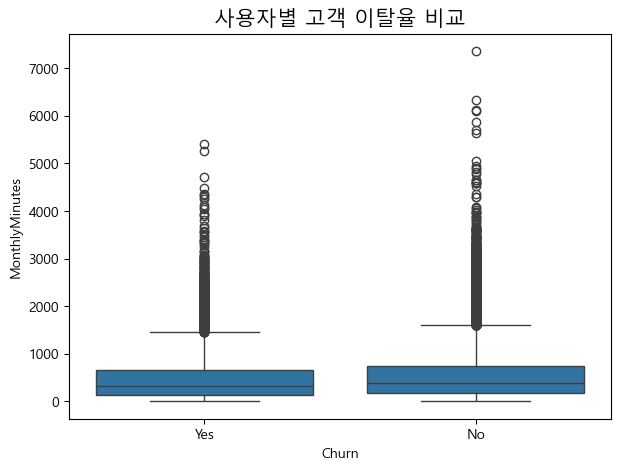

In [197]:
plt.figure(figsize = (7, 5))
sns.boxplot(x='Churn', y='MonthlyMinutes', data=df)
plt.title('사용시간별 고객 이탈율 비교', size=15)
plt.show()

#### 중요 속성별 이탈률

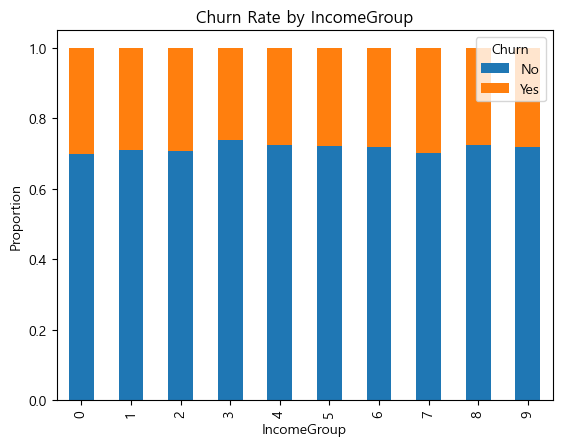

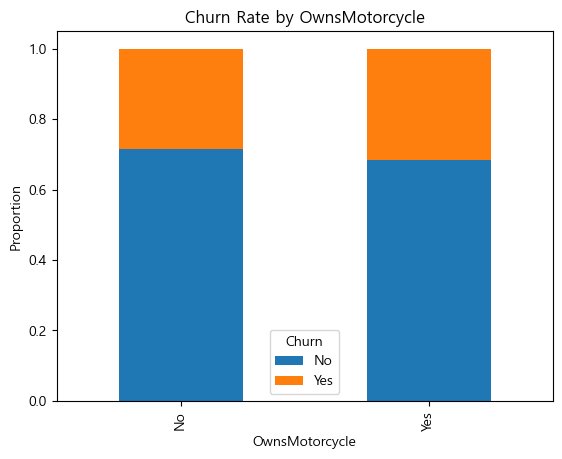

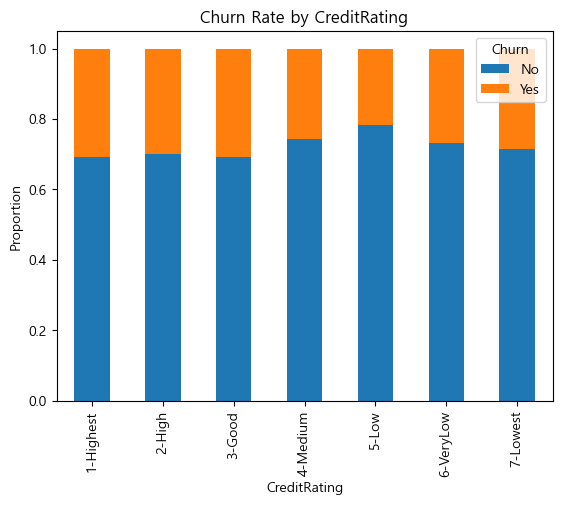

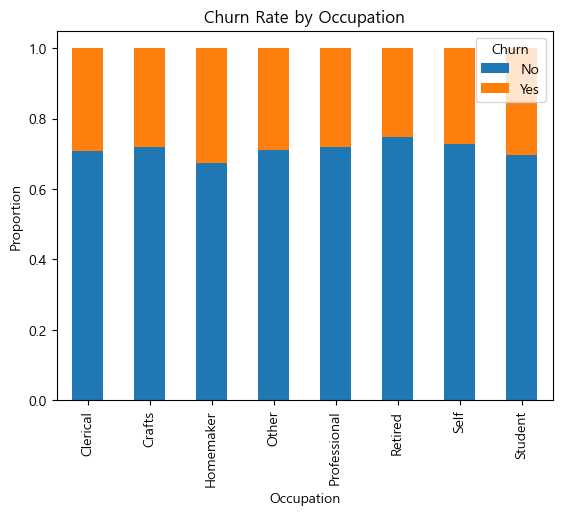

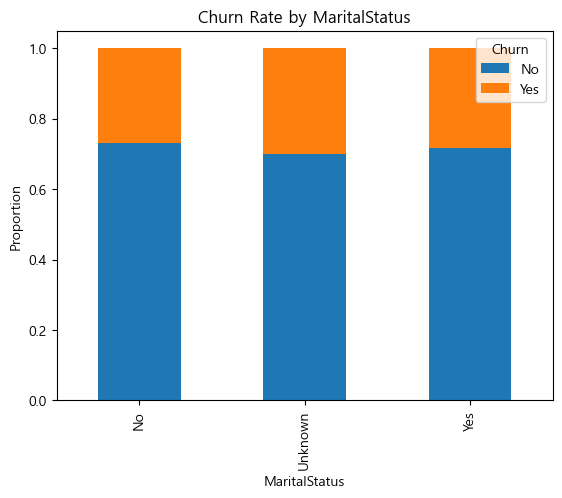

In [143]:
# 카테고리별 Churn 비율
# IncomeGroup 소득계층
# OwnsMotorcycle 오토바이 여부
# CreditRating 등급(1~7)
# Occupation: 직업
# MaritalStatus: 결혼 여부
categorical_columns = ['IncomeGroup', 'OwnsMotorcycle', 'CreditRating', 'Occupation', 'MaritalStatus']
for col in categorical_columns:
    churn_by_category = df.groupby(col)['Churn'].value_counts(normalize=True).unstack()
    churn_by_category.plot(kind='bar', stacked=True)
    plt.title(f'{col} 별 고객 이탈률')
    plt.ylabel('Proportion')
    plt.show()

#### 주요 특성들의 분포 시각화

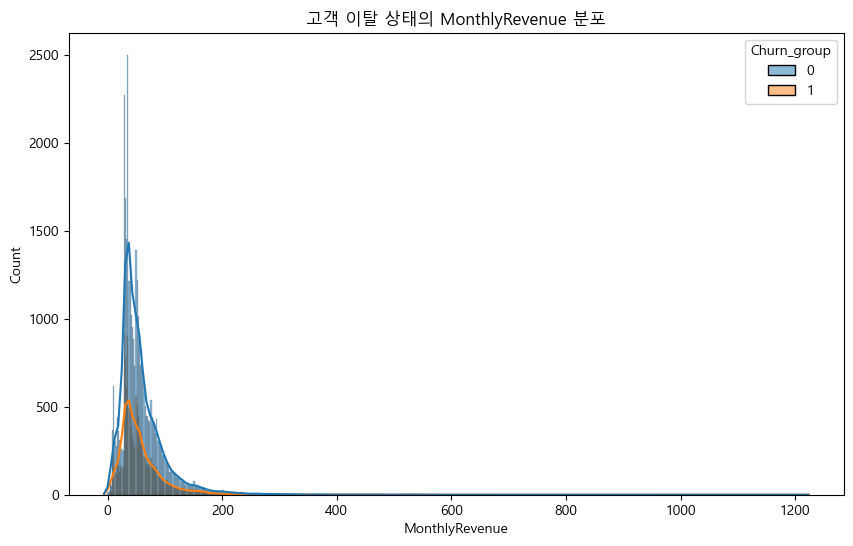

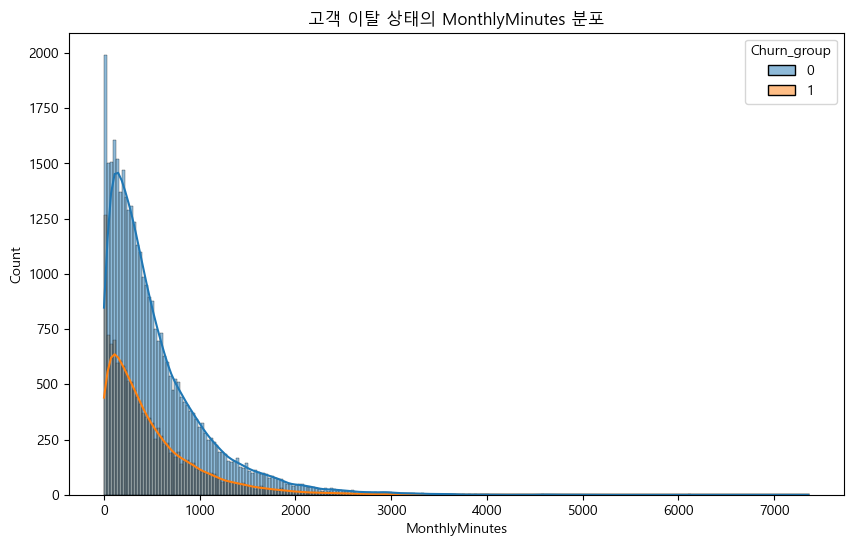

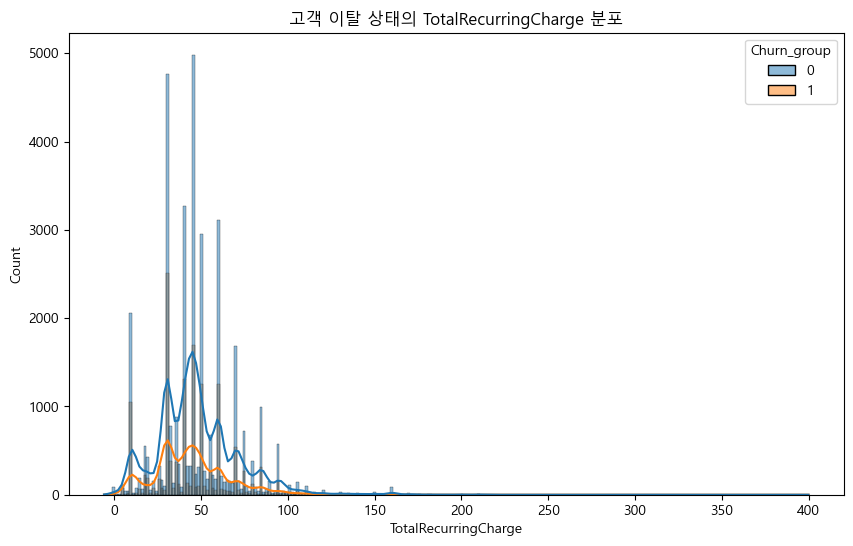

In [236]:
# TotalRecurringCharge: 월별 총 지불 요금
# OverageMinutes: 요금제를 초과해서 사용한 시간
# MonthlyMinutes: 월 사용 시간(단위: 분)
# MonthlyRevenue: 월 수입
numeric_columns = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge']
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='Churn_group', kde=True)
    plt.title(f'고객 이탈 상태의 {col} 분포')
    plt.show()